In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

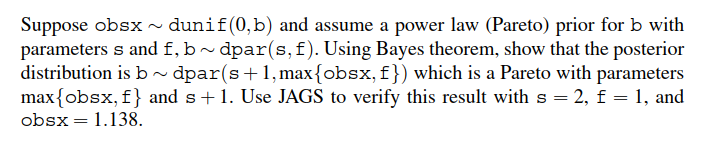

Sequential sampling (2 chains in 1 job)
Metropolis: [b]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


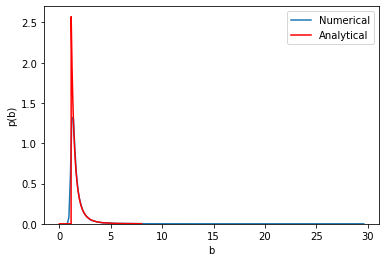

In [2]:
ss = np.linspace(0,8,1000)
with pm.Model():
    b = pm.Pareto('b',alpha = 2 ,m = 1) # b = prior
    obs = pm.Uniform('obs',0,upper = b,observed = 1.138)
    step = pm.Metropolis()
    trace = pm.sample(20000,step)
sns.kdeplot(trace['b'])
analytical = stats.pareto.pdf(ss,3,scale = 1.138) # m in pm.pareto is scale in stats.pareto
sns.lineplot(ss,analytical, color = 'red')
plt.xlabel('b')
plt.ylabel('p(b)')
plt.legend(['Numerical','Analytical'])
plt.show()